<a href="https://colab.research.google.com/github/ndtuan10/PatternRecognition_CS338.L22.KHCL/blob/main/BaiTap/Bai2_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài tập 2**
# **Ngô Đức Tuấn**
MSSV: 18520186

- Cài đặt thuật toán Kmeans từ đầu không dùng thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Thư viện được sử dụng
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # tính khoảng cách distance giữa các cặp điểm

print('''
  Phiên bản của các thư viện :
    + numpy : {0}
    + matplotlib : {1}
'''.format(np.__version__, matplotlib.__version__))


  Phiên bản của các thư viện :
    + numpy : 1.19.5
    + matplotlib : 3.2.2



# **1. Giới thiệu về thuật toán Kmeans**

## Định nghĩa:
- **`Clustering`** (phân cụm/gom nhóm) thuộc kỹ thuật **`Unsupervised learning`** (Học không có giám sát) là quá trình nhóm các đối tượng thành những nhóm/cụm/lớp có ý nghĩa. Các đối tượng trong cùng 1 nhóm có nhiều tính chất chung và có những tính chất khác với các đối tượng ở nhóm khác.
- **`Kmeans`** là phương pháp phân cụm phổ biến nhất trong các **`phương pháp dựa trên phân hoạch (partition-based clustering)`**.
- Giải thuật Kmeans phân chia tập dữ liệu `D` = {x1,x2,...,xi} thành k cụm.
    - Mỗi cụm (cluster) có một điểm trung tâm, được gọi là **`centroid`**.
    - `k` là tổng số các cụm thu được chính là giá trị được cho trước.

## Các bước thực hiện:
- Đầu vào: tập học `D`, số lượng cụm `k`, khoảng cách `d(x,y)`.
    - B1: Chọn ngẫu nhiên `k` quan sát (gọi là **các hạt nhân - seeds**) để sử dụng làm *các điểm trung tâm ban đầu (initial centroids)* của *`k` cụm*.
    - B2: Lặp hai bước sau cho đến khi gặp *điều kiện hội tụ (convergence criterion)*:
        - B2.1: Đối với mỗi quan sát, *gán nó vào cụm* trong số (*`k` cụm*) mà có tâm (centroid) gần nó nhất.
        - B2.2: Đối với mỗi cụm, *tính toán lại điểm trung tâm của nó* dựa trên tất cả các quan sát thuộc vào cụm đó.



## Điều kiện hội tụ:
- Quá trình phân cụm kết thúc nếu:
    - Không có (hoặc có không đáng kể) việc gán lại các quan sát vào các cụm khác, *hoặc*
    - Không có (hoặc có không đáng kể) thay đổi về các điểm trung tâm (centroids) của các cụm, *hoặc*
    - Giảm không đáng kể về tổng lỗi phân cụm. Công thức tính bình phương sai (Sum of Squared Error - SSE):

    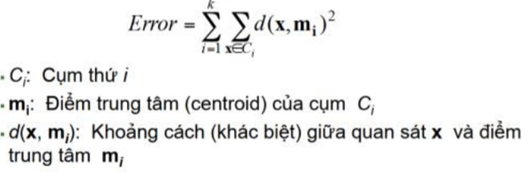


## Ưu, nhược điểm:
- Ưu điểm:
    - Cài đặt đơn giản, dễ hiểu, tương đối hiệu quả.
    - Các đối tượng tự động gán vào các nhóm.
    - Thường đạt được trạng thái tối ưu cục bộ.
    - Kmeans là giải thuật phân cụm dùng phổ biến nhất.
- Nhược điểm:
    - Cần phải xác định số nhóm (K) trước.
    - Tất cả các đối tượng phải gán vào các nhóm.
    - Phụ thuộc vào việc chọn các nhóm đầu tiên.
    - Gặp phải vấn đề khi các nhóm có kích thước, mật độ khác nhau hoặc hình dáng không phải là hình cầu.

# **2. Cài đặt Kmeans**

## Mô tả bài toán 
- Giả sử ta có 1 tập hợp các điểm trên tọa độ không gian hai chiều Oxy. Mỗi điểm co1 tọa độ (x,y) kèm theo. Việc cần làm là chia các điểm này thành K cụm riêng biệt.

In [ ]:
# tạo các điểm dữ liệu với 4 tâm cụm sau
means = [[2, 1], [8, 4], [4, 7], [6, 8]] # 4 tâm cụm
cov = [[2, 0], [0, 2]]
# Ứng với mỗi tâm cụm, ta sẽ khởi tạo 600 điểm dữ liệu xung quanh nó. Ở đây lần lượt là X0, X1, X2, X3.
n_samples = 600 
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X3 = np.random.multivariate_normal(means[3], cov, n_samples)
# ta sẽ chọn số cụm (k clustering = 4)
n_cluster = 4
X = np.concatenate((X0, X1, X2, X3), axis = 0)

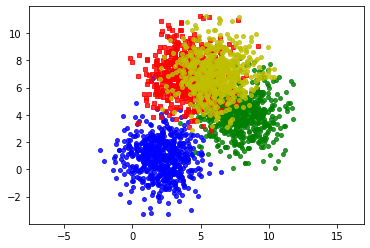

In [ ]:
# visualize dữ liệu cho thấy sự phân bố dữ liệu theo 4 cụm
original_label = np.asarray([0]*n_samples + [1]*n_samples + [2]*n_samples + [3]*n_samples).T
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X2[:, 1], 'yo', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

## Bước 1: Khởi tạo các centers ban đầu
- Có `k`, tức *số nhóm*, với mỗi nhóm được biểu diễn bằng giá trị trung bình của dữ liệu trong nhóm.
- Chọn ngẫu nhiên `k` `(n_clusters)` đối tượng như là những trung tâm của các nhóm.

- Đây là 4 tâm cụm sẽ phải học ra. Lưu ý, ban đầu 4 tâm cụm này sẽ tạo 1 cách ngẫu nhiên.

In [ ]:
# Khởi tạo các centers ban đầu
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]
  # random chỉ số k giữa 0 và kích thước (X). Sau đó trả về dưới dạng cụm

## Bước 2: Xác định các tâm cụm bằng hàm tính khoảng cách 
- Với mỗi điểm dữ liệu trong tập dữ liệu, tâm cụm của nó sẽ là 1 trong số `n_cluster` tâm cụm gần với nó nhất.
- Gán các đối tượng và nhóm có trung tâm nhóm và tính khoảng cách từ các điểm dữ liệu đến các centers.
- Ta có một số độ đo khoảng cách như khoảng cách Minkowski, Manhattan, Euclidean,... Trong bài này, ta sẽ dùng độ đo khoảng cách `Euclidean distance`. Công thức:

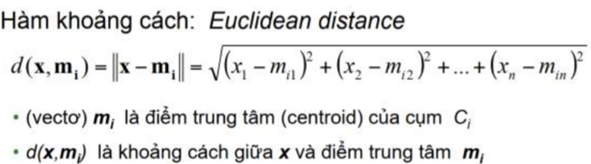

In [ ]:
# Gán nhán mới cho các điểm khi biết các centers
def kmeans_predict_labels(X, centers):
  # tính toán khoảng cách giữa dữ liệu và các centers
  D = cdist(X, centers) 
  # trả về chỉ số của center gần nhất
  return np.argmin(D, axis = 1)

## Bước 3: Cập nhật lại giá trị trung tâm (center) của từng nhóm
 - Di chuyển trung tâm nhóm về bằng với giá trị TB mới của nhóm. Tính toán lại tọa độ của mỗi tâm cụm bằng cách lấy trung bình cộng tọa độ của tất cả các điểm dữ liệu của cụm. 
 - Xác định lại điểm trung tâm bằng cách tính TB của nhóm là:
 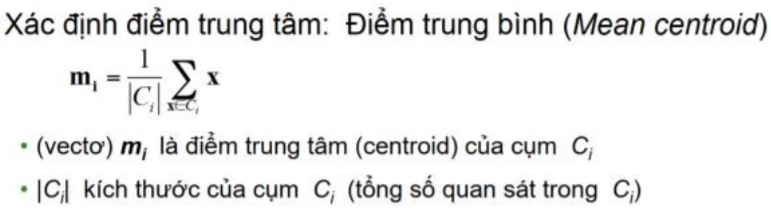

 - Sau khi tính toán xong, vị trí mới của tâm cụm sẽ nằm chính giữa cụm của nó.


In [ ]:
# Cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # thu thập tất cả các điểm được chỉ định cho cụm thứ k
    Xk = X[labels == k, :]
    # lấy hội tụ (converge)
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

## Bước 4: Kiểm tra điều kiện hội tụ (điều kiện dừng thuật toán)
- Nếu các trung tâm nhóm không có gì thay đổi thì dừng, ta sẽ được kết quả là các tâm cụm, nghĩa là tọa độ các tâm cụm mới so với tâm cũ không có sự thay đổi, ngược lại quay lại Bước 2.

In [ ]:
# kiểm tra điều kiện hội tụ
def if_kmeans_has_converged(centers, new_centers): 
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [ ]:
# Visualize dữ liệu
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

## Chạy thuật toán Kmeans

In [ ]:
def kmeans(init_centes, init_labels, X, n_cluster):
  # khởi tạo centers và nhãn ban đầu cho cụm 0
  centers = init_centes
  labels = init_labels
  times = 0
  # Lặp quá trình tìm tâm cụm cho các điểm dữ liệu và cập nhật tọa độ tâm cụm cho tới khi tọa độ của các tâm cụm không còn thay đổi nữa.
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Gán nhãn cho diểm dữ liệu tại lần thứ = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if if_kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Cập nhật vị tí center tại lần thứ = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[6.9249046  4.01347587]
 [7.68145218 8.36184232]
 [7.76740006 3.2914407 ]
 [4.06409659 0.54647454]]


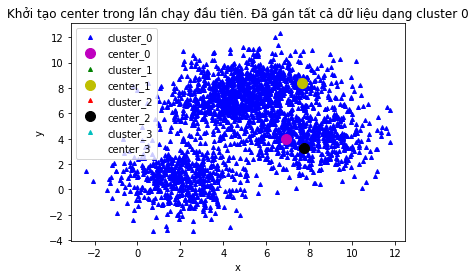

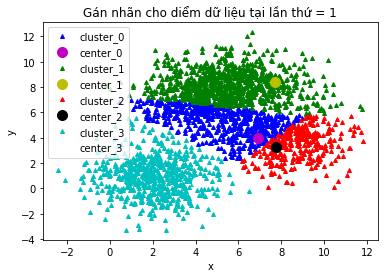

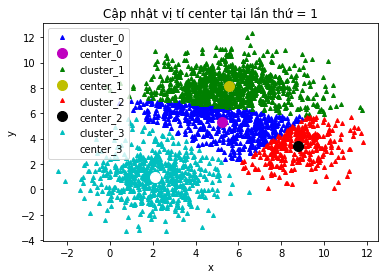

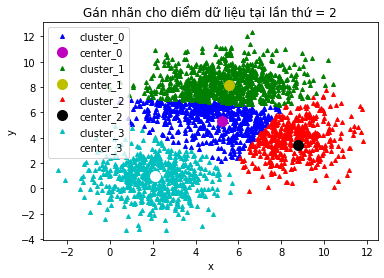

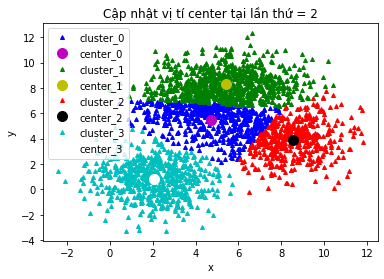

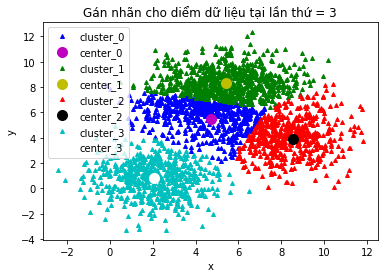

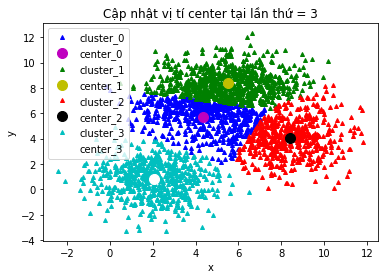

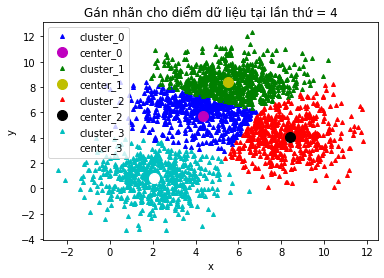

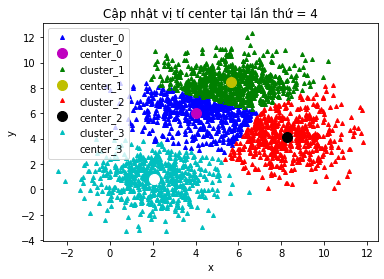

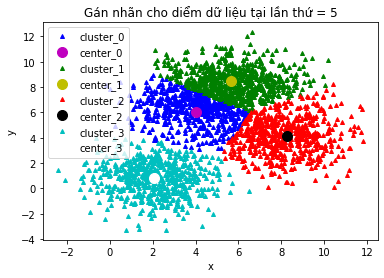

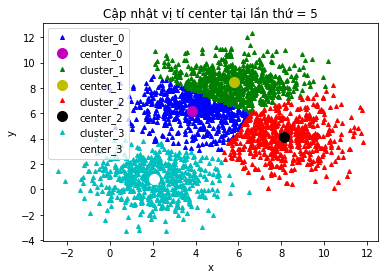

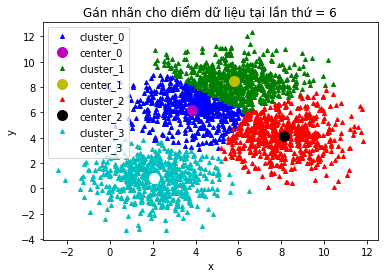

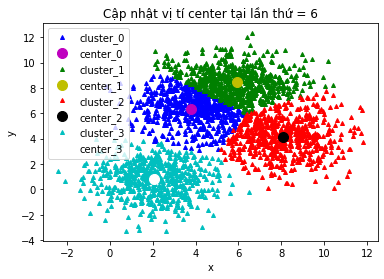

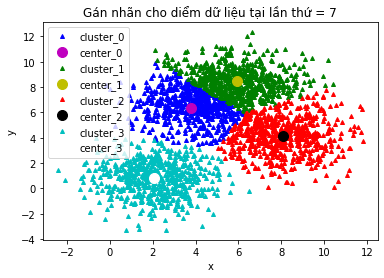

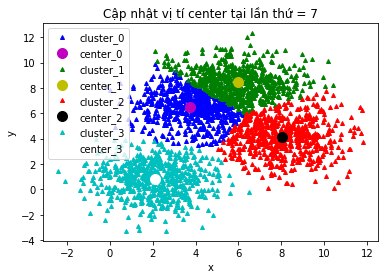

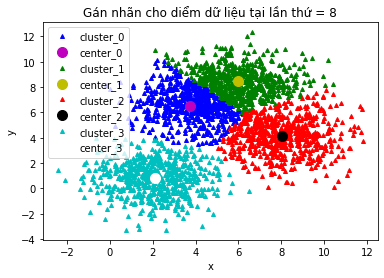

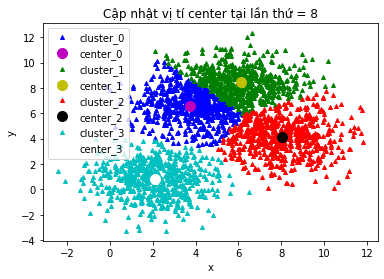

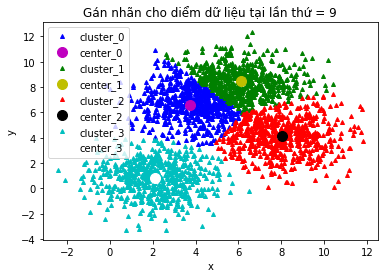

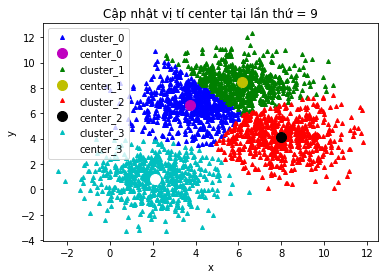

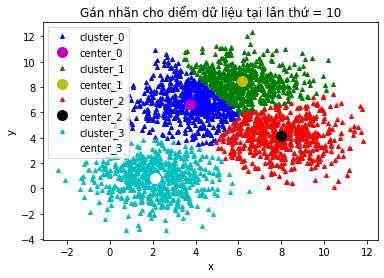

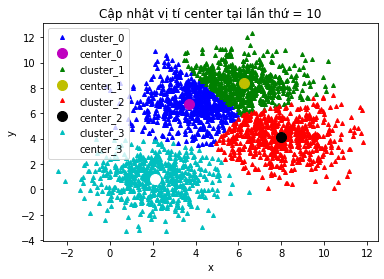

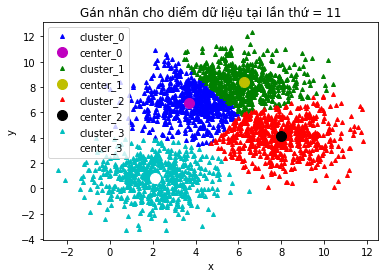

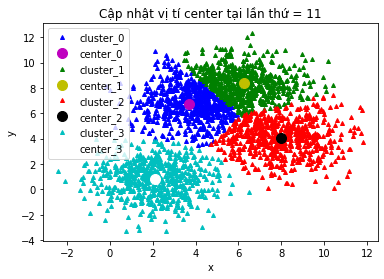

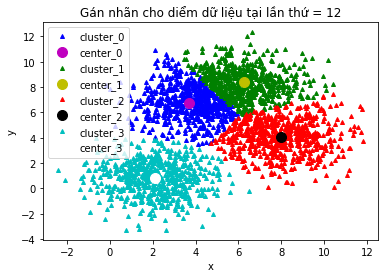

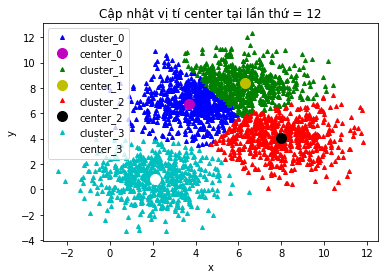

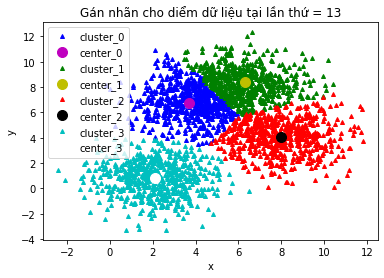

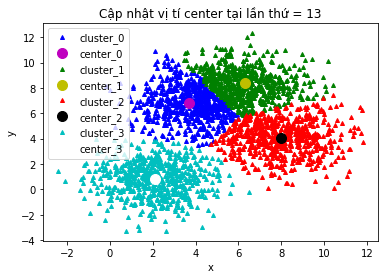

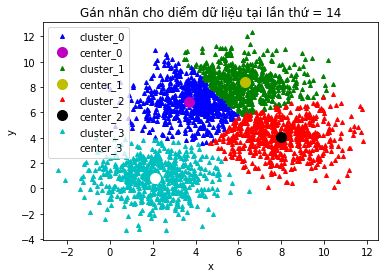

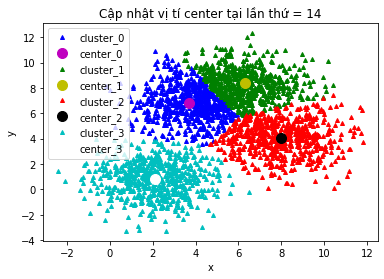

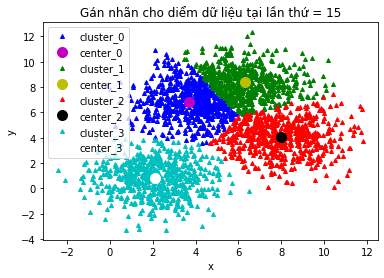

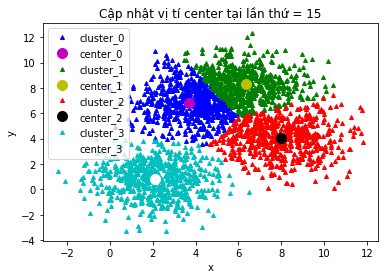

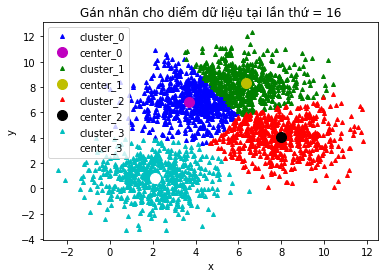

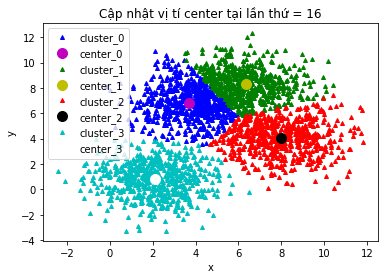

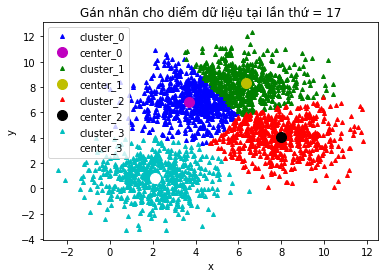

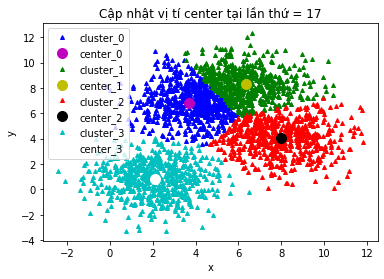

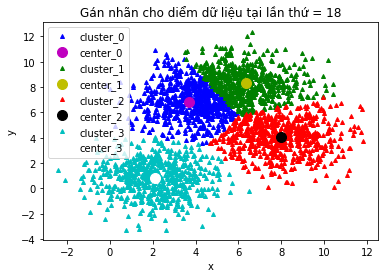

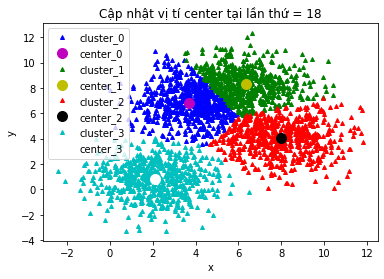

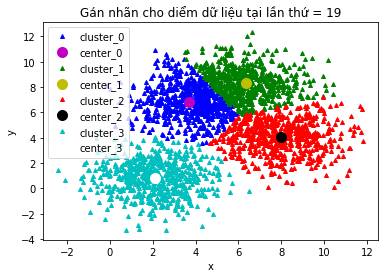

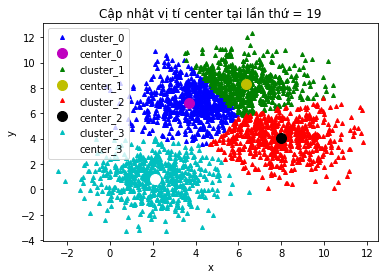

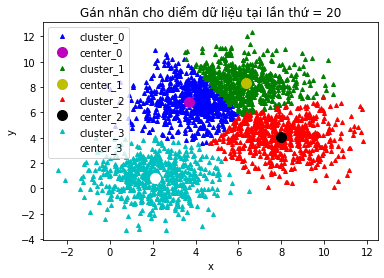

Kmeans hội tụ sau   19 lần


In [ ]:
# khởi tạo tọa độ tâm các cụm
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Khởi tạo center trong lần chạy đầu tiên. Đã gán tất cả dữ liệu dạng cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
 
print('Kmeans hội tụ sau  ', times, 'lần')

- Như vậy, Kmeans hội tụ sau khoảng 19 lần lặp. Ta sẽ xem kết quả các tâm cụm tìm được.

In [ ]:
print(centers)

[[3.71240103 6.8494515 ]
 [6.3678583  8.35666662]
 [7.96048704 4.05026198]
 [2.10022021 0.84936108]]


- Kết quả thuật toán Kmeans tìm được 4 tâm cụm sau (4,7), (6,8), (8,4), (2,1). Như vậy, thuật toán Kmeans tìm ra các cụm hoàn toàn giống với các cụm mà ta đã lựa chọn như ban đầu `[[2, 1], [8, 4], [4, 7], [6, 8]]`.

# **3. Kiểm tra thuật toán Kmeans bằng thư viện scikit-learn**

In [ ]:
from sklearn.cluster import KMeans
import time
start=time.time()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print('Các trung tâm cụm (Centers tìm được bởi thư viện scikit-learn::')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
stop = time.time()
Kmeans_time = {stop - start}
print(f"Training time: {Kmeans_time}s")

Các trung tâm cụm (Centers tìm được bởi thư viện scikit-learn::
[[3.73293408 6.87371498]
 [2.08780196 0.8489301 ]
 [6.407786   8.35132196]
 [7.95534788 4.02904371]]
Training time: {0.10404062271118164}s
